In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])
data['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [4]:
x = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=2, learning_rate=1)
clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=2)

In [21]:
y_pred = clf.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Accuracy score: 0.9666666666666667')

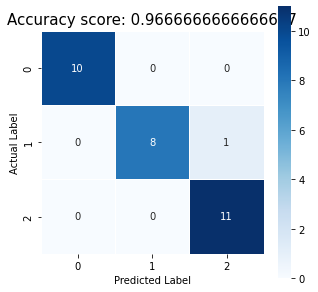

In [23]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidth=0.5, annot=True, square=True, cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy score: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15)